In [142]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [143]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [144]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [145]:
df.drop(["pdays", "poutcome"], axis = 1, inplace = True)

In [146]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,yes


In [147]:
for i in df.columns:
    print(i+ ":",df[i].unique())

age: [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
job: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'tertiary' 'primary' 'unknown']
default: ['no' 'yes']
balance: [2343   45 1270 ... 1594 2593 -134]
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [1042 1467 1389 ... 1504  818 1812]
campaign: [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
previous:

In [148]:
df["deposit"] = df["deposit"].map({"yes":1, "no": 0})

In [149]:
categorical = [i for i in df.columns if df[i].dtype == "O"]
numerical = [i for i in df.columns if df[i].dtype != "O"]

In [150]:
for i in df[categorical]:
    print(i+":")
    print()
    print(df[i].value_counts())
    print()

job:

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

marital:

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

education:

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

default:

no     10994
yes      168
Name: default, dtype: int64

housing:

no     5881
yes    5281
Name: housing, dtype: int64

loan:

no     9702
yes    1460
Name: loan, dtype: int64

contact:

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

month:

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64



In [151]:
df["job"].replace(["unknown"], "student", inplace = True)
df["education"].replace(["unknown"], "primary", inplace = True)
df["contact"].replace(["unknown"], "telephone", inplace = True)

In [152]:
for i in df[categorical]:
    print(i+":")
    print()
    print(df[i].value_counts())
    print()

job:

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
student           430
self-employed     405
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

marital:

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

education:

secondary    5476
tertiary     3689
primary      1997
Name: education, dtype: int64

default:

no     10994
yes      168
Name: default, dtype: int64

housing:

no     5881
yes    5281
Name: housing, dtype: int64

loan:

no     9702
yes    1460
Name: loan, dtype: int64

contact:

cellular     8042
telephone    3120
Name: contact, dtype: int64

month:

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64



In [153]:
import category_encoders as ce

In [154]:
encoder = ce.OneHotEncoder(cols = categorical)
df = encoder.fit_transform(df)

In [155]:
df.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,month_7,month_8,month_9,month_10,month_11,month_12,duration,campaign,previous,deposit
0,59,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1042,1,0,1
1,56,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1467,1,0,1
2,41,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1389,1,0,1
3,55,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,579,1,0,1
4,54,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,673,2,0,1


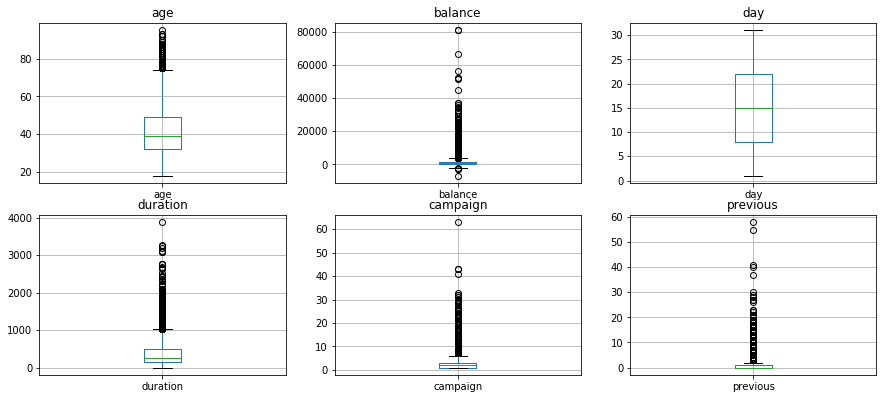

In [156]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = [numerical[i-1]])
    fig.set_title(numerical[i-1])


In [160]:
scaler = StandardScaler()
for i in numerical:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    low = df[i].quantile(0.25) - (iqr * 1.5)
    high = df[i].quantile(0.75) + (iqr * 1.5)
    df[i] = np.where(df[i] > high, high, df[i])
    df[i] = np.where(df[i] < low, low, df[i])

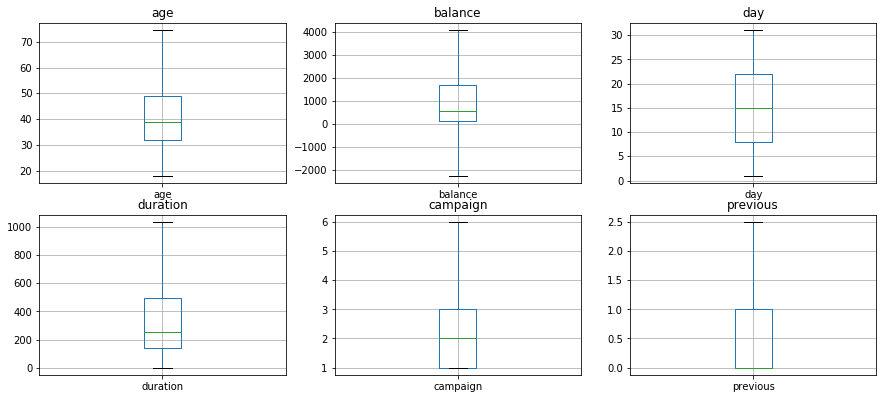

In [161]:
plt.figure(figsize = (15, 10))

for i in range(1, len(numerical)):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = [numerical[i-1]])
    fig.set_title(numerical[i-1])


In [162]:
x = df.drop("deposit", axis = 1)
y = df["deposit"]

In [163]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)

In [165]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth = 3)
clf_gini.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [170]:
clf_gini_predict_test = clf_gini.predict(xtest)


In [171]:
from sklearn.metrics import accuracy_score

In [173]:
accuracy_score(ytest, clf_gini_predict_test)

0.7717663919742028

In [174]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 0)

In [175]:
clf_entropy.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [177]:
y_pred = clf_entropy.predict(xtest)

In [179]:
accuracy_score(ytest, y_pred)


0.745969186671444